In [10]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import matlab
import matlab.engine

from multiprocessing import Pool


mass_six_span = 10007779.7; #% 深中通道非通航桥六跨连续梁质量 The mass of 6-span continuous beam of the non-navigational bridge of the Zhenzhong-Link


problem = {
    'num_vars': 4,
    'names': ['TMD_mass', 'TMD_frequency', 'TMD_damping_ratio','TMD_location'],
    'bounds': [[0.005*mass_six_span, 0.04*mass_six_span],
               [0.8, 0.9], #[0.7, 1.0],
               [0.01, 0.2],
               [0, 660]]
}

param_values = saltelli.sample(problem, 1024)

param_values.shape





C:\Users\xushe\AppData\Local\Temp\ipykernel_31284\1395985128.py:23: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)


(10240, 4)

In [ ]:
np.savetxt("param_values_mode1.txt", param_values)

[0.01533402 0.02120536 0.23108552 0.31952721]
[0.25777988 0.20360722 0.43419463 0.70642341]
x1-x2: -0.013655266026588913
x1-x3: 0.005985167897882365
x2-x3: 0.008000236842615221


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

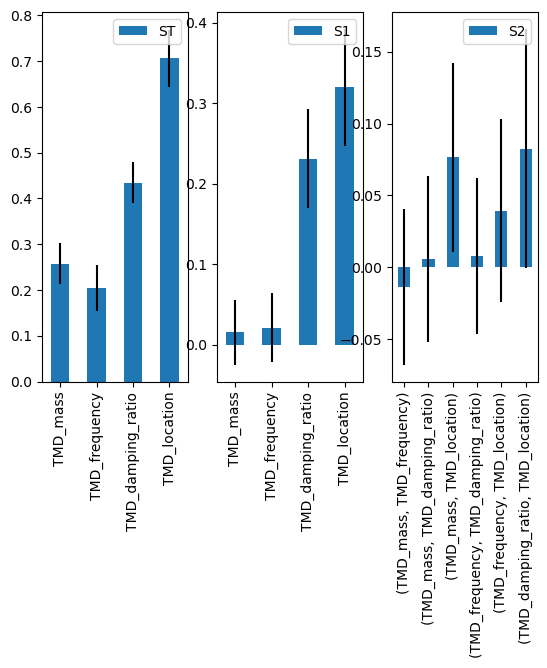

In [9]:

Y = np.loadtxt("salib_mode1.txt", float)

# Y = Ishigami.evaluate(param_values)

Si = sobol.analyze(problem, Y)

print(Si['S1'])
print(Si['ST'])

print("x1-x2:", Si['S2'][0,1])
print("x1-x3:", Si['S2'][0,2])
print("x2-x3:", Si['S2'][1,2])

Si.plot()


In [2]:
#%% 2. 定义函数
eng = matlab.engine.start_matlab()

In [3]:
mTMD = param_values[1,0]
fTMD = param_values[1,1]
TMD_damping_ratio = param_values[1,2]
pTMD = param_values[1,3]

print(mTMD)
print(fTMD)
print(TMD_damping_ratio)
print(pTMD)

245185.71603881835
0.8129394531249999
0.09507324218749999
321.298828125


In [4]:
# Y = np.zeros(10240)

# # for i in range(10240):
# #     mTMD = param_values[i,0]
# #     fTMD = param_values[i,1]
# #     TMD_damping_ratio = param_values[i,2]
# #     pTMD = param_values[i,3]
# #     test=eng.a_0_main(matlab.double([1,2,3,4,5,6]),10,1,matlab.double([0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003]),100,mTMD,fTMD,TMD_damping_ratio,pTMD)
# #     Y[i]=test["dis_all_modes_sum"]

# def func(i):
#     mTMD = param_values[i,0]
#     fTMD = param_values[i,1]
#     TMD_damping_ratio = param_values[i,2]
#     pTMD = param_values[i,3]
#     test=eng.a_0_main(matlab.double([1,2,3,4,5,6]),10,1,matlab.double([0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003,0.003]),100,mTMD,fTMD,TMD_damping_ratio,pTMD)
#     return test

# def my_parallel(func, args, n_jobs=4):
#     pool = Pool(n_jobs)
#     res = pool.map(func, args).get()
#     pool.close()
#     pool.join()
#     return res

# res=my_parallel(func, range(4))

In [ ]:
# Si = sobol.analyze(problem, Y)

# print(Si['S1'])
# print(Si['ST'])

[0.00019541 0.00019541 0.00019541 0.00019541]
[1.00048852 1.00048852 1.00048852 1.00048852]
